In [1]:
import numpy as np
np.random.seed(1001)
import pylab
import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

## 데이터 소개
- AI-Hub 한국어 음성 데이터
- part1 중 1000개 샘플링
- 확장자 : pcm, txt
- 출처 : https://aihub.or.kr/aidata/105

## PCM 파일 통한 시각화

In [30]:
fname = './KsponSpeech01/KsponSpeech_001000'
pcm_file = fname + '.pcm'

[  7  10   9 ... -15  -8 -13]


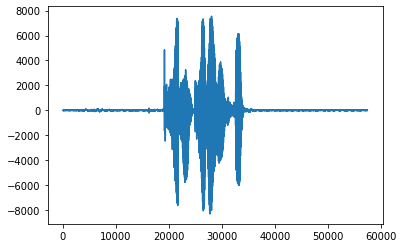

In [31]:
data = np.memmap(pcm_file, dtype='h', mode='r')
print(data)
pylab.plot(data)
pylab.show()

## Wav 파일 사용
- KsponSpeech01 폴더의 pcm2wav 스크립트 사용하여 wav파일 생성
- 자세한 내용은 KsponSpeech01 파일의 README.txt 확인
- 이유: Wav파일을 사용하는 Audio라이브러리가 다양하기 때문

In [16]:
import IPython.display as ipd  # To play sound in the notebook
wav_file = fname + '.wav'
ipd.Audio(wav_file)

## 음성 텍스트 확인

In [29]:
txt_file = fname + '.txt'
f = open(txt_file, mode='r', encoding='cp949')
f.read()

'(8분)/(팔 분) 타지 않았어?\n'

## 프레임 측정 및 시각화

In [5]:
import wave
wav = wave.open(wav_file)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  16000
Total samples (frames) =  57440
Duration =  3.59


In [6]:
from scipy.io import wavfile
rate, data = wavfile.read(wav_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  16000
Total samples (frames) =  (57440,)
[  7  10   9 ... -15  -8 -13]


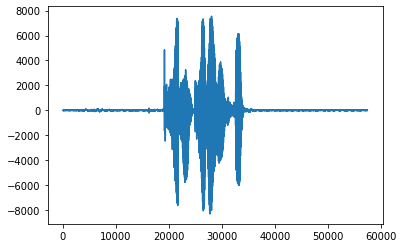

In [7]:
plt.plot(data, '-', )

## 잘라서 보기

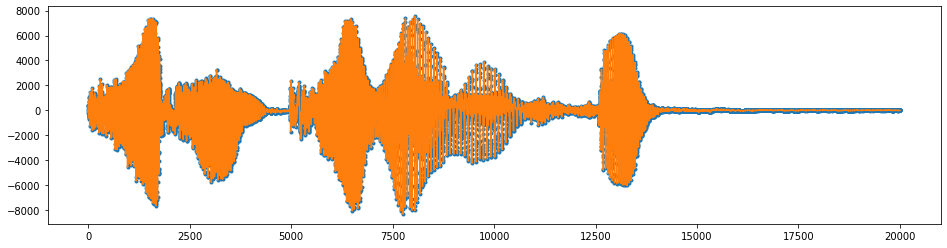

In [8]:
plt.figure(figsize=(16, 4))
plt.plot(data[20000:40000], '.'); plt.plot(data[20000:40000], '-');

## MFCC 사용


In [13]:
import librosa
SAMPLE_RATE = 16000
wav, _ = librosa.core.load(wav_file, sr=SAMPLE_RATE)
# wav = wav[:2*SAMPLE_RATE]

In [14]:
mfcc = librosa.feature.mfcc(wav, sr = SAMPLE_RATE, n_mfcc=40)
mfcc.shape

(40, 113)

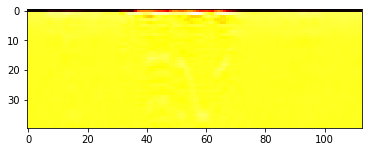

In [15]:
plt.imshow(mfcc, cmap='hot', interpolation='nearest');